In [3]:
#Alec Arroyo
#Music Genre Classification

import pandas as pd
import nltk
from pandasql import sqldf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [4]:
fileartist = pd.read_csv('/Users/alec_arroyo/Documents/Sryacuse Data Science Courses/Text Mining/artists-data.csv')


In [5]:
fileartist[:20]


,Artist,Songs,Popularity,Link,Genre,Genres
0,10000 Maniacs,110,0.3,/10000-maniacs/,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,12 Stones,75,0.3,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...
2,311,196,0.5,/311/,Rock,Rock; Surf Music; Reggae; Ska; Pop/Rock; Rock ...
3,4 Non Blondes,15,7.5,/4-non-blondes/,Rock,Rock; Pop/Rock; Rock Alternativo; Grunge; Blue...
4,A Cruz Está Vazia,13,0.0,/a-cruz-esta-vazia/,Rock,Rock
5,Aborto Elétrico,36,0.1,/aborto-eletrico/,Rock,Rock; Punk Rock; Pós-Punk; Post-Rock
6,Abril,36,0.1,/abril/,Rock,Rock; Emocore; Hardcore; Pop/Rock; Rock Altern...
7,Abuse,13,0.0,/abuse/,Rock,Rock; Hardcore
8,AC/DC,192,10.8,/ac-dc/,Rock,Rock; Heavy Metal; Classic Rock; Hard Rock; Cl...
9,ACEIA,0,0.0,/aceia/,Rock,Rock


In [6]:
filelyrics = pd.read_csv('/Users/alec_arroyo/Documents/Sryacuse Data Science Courses/Text Mining/lyrics-data.csv')

In [7]:
filelyrics[:20]

,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH
5,/10000-maniacs/,Don't Talk,/10000-maniacs/dont-talk.html,"Don't talk, I will listen. Don't talk, you kee...",ENGLISH
6,/10000-maniacs/,Across The Fields,/10000-maniacs/across-the-fields.html,"Well they left then in the morning, a hundred ...",ENGLISH
7,/10000-maniacs/,Planned Obsolescence,/10000-maniacs/planned-obsolescence.html,[ music: Dennis Drew/lyric: Natalie Merchant ]...,ENGLISH
8,/10000-maniacs/,Rainy Day,/10000-maniacs/rainy-day.html,On bended kneeI've looked through every window...,ENGLISH
9,/10000-maniacs/,Anthem For Doomed Youth,/10000-maniacs/anthem-for-doomed-youth.html,For whom do the bells toll. When sentenced to ...,ENGLISH


In [8]:
#Merge into 1 DataFrame

len(filelyrics)

209522

In [9]:
len(fileartist)

3242

In [10]:
#query = """
#SELECT Genre, COUNT(*) as Total_Count
#FROM fileartist
#GROUP BY Genre
#ORDER BY Total_Count asc
#"""

query1 = sqldf('SELECT * FROM fileartist WHERE Genre = "Rock"')
query2 = sqldf('SELECT * FROM fileartist WHERE Genre = "Funk Carioca"')
query3 = sqldf('SELECT * FROM fileartist WHERE Genre = "Hip Hop"')
query4 = sqldf('SELECT * FROM fileartist WHERE Genre = "Sertanejo"')
query5 = sqldf('SELECT * FROM fileartist WHERE Genre = "Pop"')
query6 = sqldf('SELECT * FROM fileartist WHERE Genre = "Samba"')

totalcounts = sqldf('SELECT Genre, COUNT(*) as Total_Count FROM fileartist GROUP BY Genre ORDER BY Total_Count asc')

#new = sqldf.run(query)

In [11]:
#How many artists for each genre of music
totalcounts

,Genre,Total_Count
0,Samba,193
1,Funk Carioca,302
2,Hip Hop,537
3,Sertanejo,617
4,Pop,796
5,Rock,797


<BarContainer object of 6 artists>

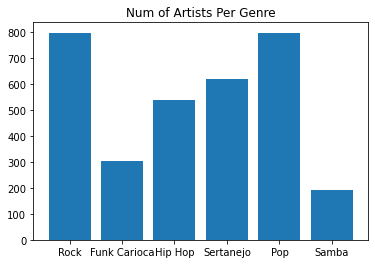

In [12]:
#How many artists for each genre of music
data = {'Rock':len(query1), 'Funk Carioca':len(query2), 'Hip Hop':len(query3), 'Sertanejo':len(query4), 'Pop':len(query5), 'Samba':len(query6)}
names = list(data.keys())
values = list(data.values())
plt.title("Num of Artists Per Genre")
plt.bar(names, values)


In [13]:
len(fileartist['Genre'])

3242

In [14]:
len(filelyrics)

209522

In [15]:
#Combine both datasets
finaldata = sqldf('SELECT a.Artist, a.Songs, a.Popularity, b.Sname, b.Lyric, a.Genre, b.Idiom FROM fileartist a JOIN filelyrics b on a.Link = b.ALink GROUP BY b.SLink ORDER BY SName')

finaldata


,Artist,Songs,Popularity,SName,Lyric,Genre,Idiom
0,Luan Santana,187,17.2,"""A""",Tá em dúvida. Não sabe se é normal gostar de d...,Sertanejo,PORTUGUESE
1,Mutantes,123,1.0,"""A"" e o ""Z""",Eu sou o começo. Sou o Fim. Sou o A e o Z. Eu ...,Rock,PORTUGUESE
2,Foxy Brown,74,0.0,"""Oh Yeah"" By Foxy Brown",[Verse One]. I'm the most critically acclaimed...,Hip Hop,ENGLISH
3,Barbie Kue,8,0.0,"""Sei Lá...""",Se um dia olhar pro lado. Eu não vou mais esta...,Rock,PORTUGUESE
4,Tiziano Ferro,160,2.1,"""Solo"" e' Solo Una Parola",Il cuore è andato in guerra ma la vita. non l'...,Pop,ITALIAN
...,...,...,...,...,...,...,...
161284,Ariana Grande,155,246.8,​Goodnight n Go,Tell me why you gotta look at me that way. You...,Pop,ENGLISH
161285,Girls' Generation,248,0.4,쉼표 (Fermata),Maeumi swineun dosi. eopseul georan geol ara. ...,Pop,None
161286,BigBang,175,1.0,착한 사람 (a Good Man),Chakhansaramieosseum angeuraetjyo. Geureona na...,Hip Hop,None
161287,BigBang,175,1.0,천국 (heaven),saranghae nan neol gieokhae. HEAVEN. SING IT T...,Hip Hop,None


In [16]:
#Get rid of None field
testdata = finaldata.dropna()

In [17]:
len(testdata)

158695

In [18]:
#How many songs for each genre of music UNBALANCED
songct = sqldf('SELECT Genre, COUNT(*) as Total_Count FROM testdata GROUP BY Genre')

songct

,Genre,Total_Count
0,Funk Carioca,4340
1,Hip Hop,18194
2,Pop,37520
3,Rock,58040
4,Samba,12282
5,Sertanejo,28319


<BarContainer object of 6 artists>

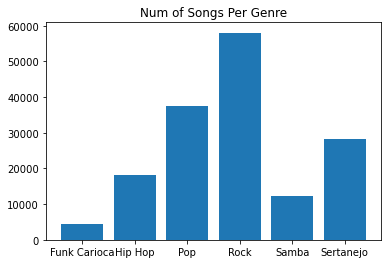

In [19]:
#create table for How many songs for each genre of music UNBALANCED
names = list(songct['Genre'])
values = list(songct['Total_Count'])

plt.title("Num of Songs Per Genre")
plt.bar(names, values)

In [20]:
#Get sum of popularity by genre of music
query10 = sqldf('select Songs, Genre, Popularity from testdata order by Popularity desc')


In [21]:
#Get sum of popularity by genre of music
querypop = sqldf('select sum(Popularity) as sum_pop, Genre from query10 group by genre')

In [22]:
display(querypop)

,sum_pop,Genre
0,5727.7,Funk Carioca
1,99648.4,Hip Hop
2,292820.5,Pop
3,252171.3,Rock
4,48876.2,Samba
5,118477.0,Sertanejo


<BarContainer object of 6 artists>

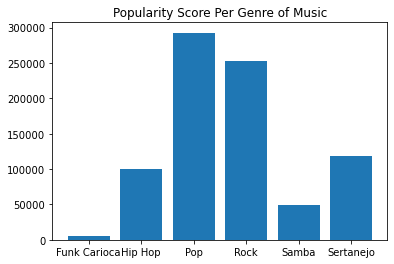

In [23]:
names = list(querypop['Genre'])
values = list(querypop['sum_pop'])

plt.title("Popularity Score Per Genre of Music")
plt.bar(names, values)

In [24]:
#Time to preprocess data. Function created to do so

In [25]:
def vectorize(keywords):

    #------------------------------------------------------------------------------------------------------------
    ## Lowercase Words
    #------------------------------------------------------------------------------------------------------------
    
    keywords = [w.lower( ) for w in keywords]
    #print(keywords[:10])
    
    #get count of total words
    print("total words before vectorization: ", len(keywords))
    
    #---------------------------
    ## Add Stemming
    #------------------------------
    
    #Time to stem words together    
    ps = PorterStemmer()   ## method from nltk
    
    stemmed_words=[]  ## make new empty list
    for w in keywords:
        stemmed_words.append(ps.stem(w))
        
    #get count of total words after stemming
    print("total words after stemming (Should be the same): ", len(stemmed_words))
        
        
    #------------------------------------------------------------------------------------------------------------
    ## Removing Stopwords
    #------------------------------------------------------------------------------------------------------------
    
    #Get NLTK stop words
    stop_words=set(stopwords.words("english"))
    
    stop_words_span = set(stopwords.words("spanish"))
    
    stop_words_port = set(stopwords.words("portuguese"))
    
    stop_words_germ = set(stopwords.words("german"))
    
    morestopwords = set(['\'s', '\'nt', 'nt\'', 'nt', 'i', 'n\'t', '\'m', '\'ll', '\'re', 'ca', '\'ve', 'oh', 'yeah', 'a', 'e', 'i', 'o', 'u', 'im', 'thi', 'hi', '\'na', 'na\'', 'na', 'n\'a'])
    
    stop_words = stop_words.union(morestopwords)
    
    stop_words = stop_words.union(stop_words_span)
    
    stop_words = stop_words.union(stop_words_port)
    
    stop_words = stop_words.union(stop_words_germ)
     
    #print(stop_words)
    
    filtered_text=[]   ## Create a new empty list
    
    for w in stemmed_words:
        #print(w)
        if w not in stop_words:
            filtered_text.append(w)
        
    #get count of total words after removing stopwords
    print("total words after removing stopwords: ", len(filtered_text))
    
    
    #------------------------------------------------------------------------------------------------------------
    ## Remove Punctuation
    #------------------------------------------------------------------------------------------------------------
    
    #Check punctuation
    #print(string.punctuation)
    
    #Any reference to punctuation turn into blank
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in filtered_text]
    #print(stripped[:100])
    
    #get count of total words after removing punctuation
    #print("total words after removing punctuation: ", len(stripped))
    
    #------------------------------------------------------------------------------------------------------------
    ## Remove Empty Strings
    #------------------------------------------------------------------------------------------------------------
    
    #remove empty strings 
    while("" in stripped) :
        stripped.remove("")
        
    #get count of total words after removing empty strings
    print("total words after removing punctuation/empty strings: ", len(stripped))
        
    return(stripped)
    

In [26]:
testdata['Lyric'] = vectorize(testdata['Lyric'])

total words before vectorization:  158695
total words after stemming (Should be the same):  158695
total words after removing stopwords:  158695
total words after removing punctuation/empty strings:  158695


<ipython-input-26-b239be5f6fc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata['Lyric'] = vectorize(testdata['Lyric'])


In [27]:
display(testdata)

,Artist,Songs,Popularity,SName,Lyric,Genre,Idiom
0,Luan Santana,187,17.2,"""A""",tá em dúvida não sabe se é normal gostar de do...,Sertanejo,PORTUGUESE
1,Mutantes,123,1.0,"""A"" e o ""Z""",eu sou o começo sou o fim sou o a e o z eu sou...,Rock,PORTUGUESE
2,Foxy Brown,74,0.0,"""Oh Yeah"" By Foxy Brown",verse one im the most critically acclaimed rap...,Hip Hop,ENGLISH
3,Barbie Kue,8,0.0,"""Sei Lá...""",se um dia olhar pro lado eu não vou mais estar...,Rock,PORTUGUESE
4,Tiziano Ferro,160,2.1,"""Solo"" e' Solo Una Parola",il cuore è andato in guerra ma la vita non lho...,Pop,ITALIAN
...,...,...,...,...,...,...,...
161280,MV Bill,92,1.7,é Nós E A Gente,a paz não precisa ser um sonho basta o respeit...,Hip Hop,PORTUGUESE
161281,Furacão 2000,57,2.8,é O Kit,é o kit é o kit furacão se liga mané é o kit t...,Funk Carioca,PORTUGUESE
161282,Fundo de Quintal,315,4.6,ô Irene,ô irene ô irene ô irene ô irene vai buscar o q...,Samba,PORTUGUESE
161283,Vremya I Steklo,5,0.0,На Стилe,а мы на стиле даже и не думай чтото отменять у...,Pop,RUSSIAN


In [28]:
X = testdata['Lyric'].values
Y = testdata['Genre'].values

In [29]:
#use bayes to train adn test using CV

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(X_train[0])
print(Y_train[0])
print(X_test[0])
print(Y_test[0])

(95217,) (95217,) (63478,) (63478,)
fiquei no sofá esperando você ainda bem que eu sentei se não além do coração a perna ia doer doeu não fiquei com ninguém primeiro porque quem se aproximou de mim tava com dó do que você aprontou comigo graças a deus arranjei um monte de amigo um monte de conselho um pouco de vergonha na cara 3 doses de whisky do tempo que o cigarro apaga esse amor acaba e some igual fumaça se até o tempo passa imagina o seu amor devolve o meu tempo que eu fiquei ligando mandando mensagem implorando por favor vou te cobrar com juros o que você me tirou se até o tempo passa imagina o nosso amor e esse arranhadinho no meu coração soprou passou passou e o tempo levou se é pra viver sofrendo eu vou sofrer com um novo amor
Sertanejo
eu não sei o que acontece comigo você era só meu amigo não sei se te passa o mesmo e também se amarrou tanto em mim eu sei o que se passa comigo meu corpo não sabe mentir te olho te chamo te sinto na pele não deixo um segundo de pensar em ti re

In [30]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(95217,) (95217,) (63478,) (63478,)


In [31]:
# Check how many training examples in each category
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)))

[['Funk Carioca' 'Hip Hop' 'Pop' 'Rock' 'Samba' 'Sertanejo']
 [2589 11011 22447 34998 7217 16955]]


In [32]:
#  unigram boolean vectorizer, set minimum document frequency to 5
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

X_train_vec = unigram_bool_vectorizer.fit_transform(X_train)

# use the vocabulary constructed from the training data to vectorize the test data. 
X_test_vec = unigram_bool_vectorizer.transform(X_test)

In [33]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(X_train_vec,Y_train)

MultinomialNB()

In [34]:
# test the classifier on the test data set, print accuracy score
nb_clf.score(X_test_vec,Y_test)

0.629572450297741

In [35]:
#predict NB models
Y_pred = nb_clf.fit(X_train_vec, Y_train).predict(X_test_vec)

In [36]:
# cross validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, Y_test, Y_pred, cv=3)
avg=sum(scores)/len(scores)
print(avg)

0.7104980621562674


In [37]:
# print accuracies and classification report
from sklearn.metrics import classification_report
target_names = ["Samba", "Funk Carioca", "Hip Hop", "Sertanejo", "Pop", "Rock"]
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Samba       0.45      0.73      0.56      1751
Funk Carioca       0.80      0.55      0.65      7183
     Hip Hop       0.69      0.20      0.31     15073
   Sertanejo       0.67      0.80      0.73     23042
         Pop       0.53      0.50      0.52      5065
        Rock       0.57      0.94      0.71     11364

    accuracy                           0.63     63478
   macro avg       0.62      0.62      0.58     63478
weighted avg       0.65      0.63      0.60     63478



In [38]:
#confusion martix
df = pd.DataFrame(
    confusion_matrix(Y_test, Y_pred, labels=["Samba", "Funk Carioca", "Hip Hop", "Sertanejo", "Pop", "Rock"]),
    index = ['T:Samba', 'T:Funk Carioca', 'T:Hip Hop', 'T:Sertanejo', 'T:Pop', 'T:Rock'], 
    columns = ['P:Samba', 'P:Funk Carioca', 'P:Hip Hop', 'P:Sertanejo', 'P:Pop', 'P:Rock']
)
print(df)


                P:Samba  P:Funk Carioca  P:Hip Hop  P:Sertanejo  P:Pop  P:Rock
T:Samba            2546              95          0         2344     67      13
T:Funk Carioca       77            1280          3          385      3       3
T:Hip Hop           268             856       3976          419    738     926
T:Sertanejo         315             275          0        10683     69      22
T:Pop               700             194        697         2293   3026    8163
T:Rock              873             152        306         2753    505   18453


In [37]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1)

# use the training data to train the model
svm_clf.fit(X_train_vec,Y_train)

/Users/alec_arroyo/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1)

In [38]:
# test the classifier on the test data set, print accuracy score
svm_clf.score(X_test_vec,Y_test)

0.6816377327578058

In [39]:
#predict the SVM model
Y_pred = svm_clf.fit(X_train_vec, Y_train).predict(X_test_vec)

/Users/alec_arroyo/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
# print confusion matrix and classification report
from sklearn.metrics import classification_report
target_names = ["Samba", "Funk Carioca", "Hip Hop", "Sertanejo", "Pop", "Rock"]
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Samba       0.72      0.66      0.69      1751
Funk Carioca       0.79      0.72      0.75      7183
     Hip Hop       0.53      0.53      0.53     15073
   Sertanejo       0.72      0.74      0.73     23042
         Pop       0.61      0.58      0.60      5065
        Rock       0.76      0.79      0.78     11364

    accuracy                           0.68     63478
   macro avg       0.69      0.67      0.68     63478
weighted avg       0.68      0.68      0.68     63478



In [41]:
# cross validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
svm_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False)),('svm', LinearSVC(C=1))])
scores = cross_val_score(svm_clf_pipe, Y_test, Y_pred, cv=3)
avg=sum(scores)/len(scores)
print(avg)

0.6815117255307007


In [42]:
#confusion martix
df = pd.DataFrame(
    confusion_matrix(Y_test, Y_pred, labels=["Samba", "Funk Carioca", "Hip Hop", "Sertanejo", "Pop", "Rock"]),
    index = ['T:Samba', 'T:Funk Carioca', 'T:Hip Hop', 'T:Sertanejo', 'T:Pop', 'T:Rock'], 
    columns = ['P:Samba', 'P:Funk Carioca', 'P:Hip Hop', 'P:Sertanejo', 'P:Pop', 'P:Rock']
)
print(df)


                P:Samba  P:Funk Carioca  P:Hip Hop  P:Sertanejo  P:Pop  P:Rock
T:Samba            2956              73         66         1064    504     402
T:Funk Carioca      123            1153         59          183    153      80
T:Hip Hop            71              69       5140          100   1103     700
T:Sertanejo         862             151         40         8994    792     525
T:Pop               437              94        792          841   7957    4952
T:Rock              394              54        375          616   4542   17061


In [43]:
#perform Oversampling to deal w/ unbalanced data

In [44]:
newbalanceddata = testdata

In [45]:
bal_X = pd.DataFrame(newbalanceddata.Lyric)
bal_Y = pd.DataFrame(newbalanceddata.Genre)

In [46]:
sqldf('select count(*), Genre from bal_Y group by Genre')

,count(*),Genre
0,4340,Funk Carioca
1,18194,Hip Hop
2,37520,Pop
3,58040,Rock
4,12282,Samba
5,28319,Sertanejo


In [47]:
#most important part
ran = RandomOverSampler(sampling_strategy = 'not majority')

In [48]:
ran_X, ran_Y = ran.fit_resample(bal_X, bal_Y)

In [49]:
sqldf('select count(*), Genre from ran_Y group by Genre')

,count(*),Genre
0,58040,Funk Carioca
1,58040,Hip Hop
2,58040,Pop
3,58040,Rock
4,58040,Samba
5,58040,Sertanejo


In [2]:
#use bayes to train and test BALANCED DATASET

ran_X = ran_X['Lyric'].values
ran_Y = ran_Y['Genre'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(ran_X, ran_Y, test_size=0.4, random_state=0)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# Check how many training examples in each category
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)))


#  unigram boolean vectorizer, set minimum document frequency to 5
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

X_train_vec = unigram_bool_vectorizer.fit_transform(X_train)

# use the vocabulary constructed from the training data to vectorize the test data. 
X_test_vec = unigram_bool_vectorizer.transform(X_test)


# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(X_train_vec,Y_train)


# test the classifier on the test data set, print accuracy score
print(nb_clf.score(X_test_vec,Y_test))

#predict the NB model
Y_pred = nb_clf.fit(X_train_vec, Y_train).predict(X_test_vec)


# print confusion matrix and classification report

from sklearn.metrics import classification_report
target_names = ["Samba", "Funk Carioca", "Hip Hop", "Sertanejo", "Pop", "Rock"]
print(classification_report(Y_test, Y_pred, target_names=target_names))


#confusion martix
df = pd.DataFrame(
    confusion_matrix(Y_test, Y_pred, labels=["Samba", "Funk Carioca", "Hip Hop", "Sertanejo", "Pop", "Rock"]),
    index = ['T:Samba', 'T:Funk Carioca', 'T:Hip Hop', 'T:Sertanejo', 'T:Pop', 'T:Rock'], 
    columns = ['P:Samba', 'P:Funk Carioca', 'P:Hip Hop', 'P:Sertanejo', 'P:Pop', 'P:Rock']
)
print(df)


NameError: name 'ran_X' is not defined

In [51]:
#repeat same process for SVM

newbalanceddata = testdata

bal_X = pd.DataFrame(newbalanceddata.Lyric)
bal_Y = pd.DataFrame(newbalanceddata.Genre)

#most important part
ran = RandomOverSampler(sampling_strategy = 'not majority')

ran_X, ran_Y = ran.fit_resample(bal_X, bal_Y)

In [52]:
#use SVM to train and test BALANCED DATASET

ran_X = ran_X['Lyric'].values
ran_Y = ran_Y['Genre'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(ran_X, ran_Y, test_size=0.4, random_state=0)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)



# Check how many training examples in each category
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)))


#  unigram boolean vectorizer, set minimum document frequency to 5
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

X_train_vec = unigram_bool_vectorizer.fit_transform(X_train)

# use the vocabulary constructed from the training data to vectorize the test data. 
X_test_vec = unigram_bool_vectorizer.transform(X_test)



# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model
svm_clf = LinearSVC(C=1)

# use the training data to train the model
svm_clf.fit(X_train_vec,Y_train)


# test the classifier on the test data set, print accuracy score
print(svm_clf.score(X_test_vec,Y_test))


#predict the SVM model
Y_pred = svm_clf.fit(X_train_vec, Y_train).predict(X_test_vec)


# print confusion matrix and classification report
from sklearn.metrics import classification_report
target_names = ["Samba", "Funk Carioca", "Hip Hop", "Sertanejo", "Pop", "Rock"]
print(classification_report(Y_test, Y_pred, target_names=target_names))


#confusion martix
df = pd.DataFrame(
    confusion_matrix(Y_test, Y_pred, labels=["Samba", "Funk Carioca", "Hip Hop", "Sertanejo", "Pop", "Rock"]),
    index = ['T:Samba', 'T:Funk Carioca', 'T:Hip Hop', 'T:Sertanejo', 'T:Pop', 'T:Rock'], 
    columns = ['P:Samba', 'P:Funk Carioca', 'P:Hip Hop', 'P:Sertanejo', 'P:Pop', 'P:Rock']
)
print(df)


(208944,) (208944,) (139296,) (139296,)
[['Funk Carioca' 'Hip Hop' 'Pop' 'Rock' 'Samba' 'Sertanejo']
 [34889 34757 34799 34710 35033 34756]]


/Users/alec_arroyo/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8725950493912245


/Users/alec_arroyo/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

       Samba       0.98      1.00      0.99     23151
Funk Carioca       0.93      0.95      0.94     23283
     Hip Hop       0.72      0.71      0.71     23241
   Sertanejo       0.76      0.69      0.73     23330
         Pop       0.91      0.97      0.94     23007
        Rock       0.91      0.92      0.91     23284

    accuracy                           0.87    139296
   macro avg       0.87      0.87      0.87    139296
weighted avg       0.87      0.87      0.87    139296

                P:Samba  P:Funk Carioca  P:Hip Hop  P:Sertanejo  P:Pop  P:Rock
T:Samba           22413              28         13          363    112      78
T:Funk Carioca        0           23151          0            0      0       0
T:Hip Hop            56              49      22030           59    655     434
T:Sertanejo         908             144         40        21329    546     317
T:Pop               600             123        923          88

numpy.ndarray

In [19]:
newArray = ['Buddy, youre a boy, make a big noise Playing in the street, gonna be a big man someday You got mud on your face, you big disgrace Kicking your can all over the place, singin We will, we will rock you We will, we will rock you Buddy, youre a young man, hard man Shouting in the street, gonna take on the world someday You got blood on your face, you big disgrace Waving your banner all over the place We will, we will rock you, sing it! We will, we will rock you, yeah Buddy, youre an old man, poor man Pleading with your eyes, gonna get you some peace someday You got mud on your face, big disgrace Somebody better put you back into your place, do it! We will, we will rock you, yeah, yeah, come on We will, we will rock you, alright, louder! We will, we will rock you, one more time We will, we will rock you Yeah']

In [ ]:
#Intake new song and predict what genre of music it is

In [20]:
newArray

'Buddy, youre a boy, make a big noise Playing in the street, gonna be a big man someday You got mud on your face, you big disgrace Kicking your can all over the place, singin We will, we will rock you We will, we will rock you Buddy, youre a young man, hard man Shouting in the street, gonna take on the world someday You got blood on your face, you big disgrace Waving your banner all over the place We will, we will rock you, sing it! We will, we will rock you, yeah Buddy, youre an old man, poor man Pleading with your eyes, gonna get you some peace someday You got mud on your face, big disgrace Somebody better put you back into your place, do it! We will, we will rock you, yeah, yeah, come on We will, we will rock you, alright, louder! We will, we will rock you, one more time We will, we will rock you Yeah'

In [29]:
#Transform to fit model
X_test_vecARRAY = unigram_bool_vectorizer.transform(newArray)

In [31]:
#predict Lyrics to genre
Y_pred = nb_clf.fit(X_train_vec, Y_train).predict(X_test_vecARRAY)

In [32]:
#Genre prediction was correct. this is a rock song
Y_pred

array(['Rock'], dtype='<U12')

In [33]:
#Prompt user to input song lyrics
newlyric = input("Enter your song lyrics for one song here: ")

Enter your song lyrics for one song here: Ain't this what they've been waitin' for? You ready? Uh, uh I used to pray for times like this, to rhyme like this So I had to grind like that to shine like this In a matter of time I spent on some locked-up shit In the back of the paddy wagon, cuffs locked on wrists Seen my dreams unfold, nightmares come true It was time to marry the game and I said, "Yeah, I do." If you want it, you gotta see it with a clear-eyed view Got a shorty, she tryna bless me like I said achoo Like a nigga sneezed, nigga please, 'fore them triggers squeeze I'm gettin' cream, never let them hoes get in between Of what we started, lil' nigga but I'm lion-hearted They love me when I was stuck and they hated when I departed I go and get it regardless, draw it like I'm a artist No crawlin', went straight to walkin', with foreigns in my garages All foreign bitches ménagin', fuckin', suckin' and swallowin' Anything for a dollar, they tell me get 'em, I got 'em I did it witho

In [40]:
#Convert lyrics variable into a list
newlyric1 = []
newlyric1 = [newlyric]

In [42]:
#Transform to fit model
X_test_vecARRAY = unigram_bool_vectorizer.transform(newlyric1)

In [43]:
#predict Lyrics to genre
Y_pred = nb_clf.fit(X_train_vec, Y_train).predict(X_test_vecARRAY)

In [44]:
#Genre prediction was correct. this is a Hip Hop song
Y_pred

array(['Hip Hop'], dtype='<U12')